# K-means & 階層的クラスタリング

In [1]:
# 表形式のデータを操作するためのライブラリ
import pandas as pd

# 機械学習用ライブラリsklearnのKmeansクラス
from sklearn.cluster import KMeans

# 距離行列の計算のためのライブラリ
import scipy.spatial.distance as distance

# 階層的クラスタリング用のライブラリ
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# グラフ描画ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(style='ticks')
%matplotlib inline


# 警告文を表示させないおまじない
import warnings
warnings.filterwarnings('ignore')


---


## クイズ


(L3-Q1)=
### Q1: ユークリッド距離とコサイン類似度

以下の図のように，2次元のユークリッド空間上に，13個のデータ点が図のように分布している状況を考える（各点の座標については，下記コードのリスト``data``に収められている）．

N次元空間上の任意の点$v_1$，$v_2$が与えられたとき，$v_1$と$v_2$のユークリッド距離を求める関数``calc_euclidean_dist(v1, v2)``，コサイン類似度を求める関数``calc_cosine_sim(v1, v2)``を実装しなさい．
さらに，下図の13つの点のすべての組み合わせについて，そのユークリッド距離とコサイン類似度を求めなさい．

なお，実装する関数の第1引数および第2引数は，実数のリストを想定しなさい．

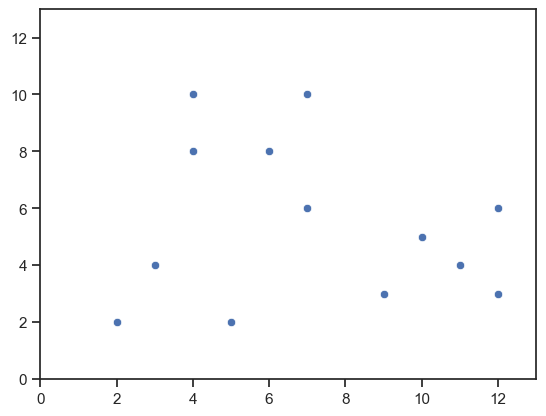

In [2]:
data = [(2, 2), (3, 4), (5, 2), (10, 5), (9, 3),
        (11, 4), (12, 3), (12, 6), (4, 10), (4, 8),
        (6, 8), (7, 10), (7, 6)]

xs, ys = zip(*data) # zipの逆操作

# 可視化
ax = sns.scatterplot(x=xs, y=ys)
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.show()

In [3]:
# write your code
import math

def calc_euclidean_dist(v1, v2):
    if len(v1) == len(v2):
        dist = 0
        for idx in range(len(v1)):
            x1 = v1[idx]
            x2 = v2[idx]
            dist += (x1 - x2) ** 2
        return math.sqrt(dist)
    else:
        return None

In [4]:
# write your code

# 内積
def inner_product(v1, v2):
    if len(v1) == len(v2):
        result = 0
        for idx in range(len(v1)):
            x1 = v1[idx]
            x2 = v2[idx]
            result += x1 * x2
        return result
    else:
        return None

# ベクトルの絶対値
def norm(v):
    result = 0
    for x in v:
        result += x ** 2
    return math.sqrt(result)


def calc_cosine_sim(v1, v2):
    if norm(v1) > 0 and norm(v2):
        return inner_product(v1, v2) / (norm(v1) * norm(v2))
    else:
        return None

In [5]:
# データ数
N = len(data)

# ユークリッド距離
for i in range(N):
    for j in range(i, N):
        euclidean_dist = calc_euclidean_dist(data[i], data[j])
        print(f'{data[i]} - {data[j]}: Euclidean = {euclidean_dist:.3f}')

(2, 2) - (2, 2): Euclidean = 0.000
(2, 2) - (3, 4): Euclidean = 2.236
(2, 2) - (5, 2): Euclidean = 3.000
(2, 2) - (10, 5): Euclidean = 8.544
(2, 2) - (9, 3): Euclidean = 7.071
(2, 2) - (11, 4): Euclidean = 9.220
(2, 2) - (12, 3): Euclidean = 10.050
(2, 2) - (12, 6): Euclidean = 10.770
(2, 2) - (4, 10): Euclidean = 8.246
(2, 2) - (4, 8): Euclidean = 6.325
(2, 2) - (6, 8): Euclidean = 7.211
(2, 2) - (7, 10): Euclidean = 9.434
(2, 2) - (7, 6): Euclidean = 6.403
(3, 4) - (3, 4): Euclidean = 0.000
(3, 4) - (5, 2): Euclidean = 2.828
(3, 4) - (10, 5): Euclidean = 7.071
(3, 4) - (9, 3): Euclidean = 6.083
(3, 4) - (11, 4): Euclidean = 8.000
(3, 4) - (12, 3): Euclidean = 9.055
(3, 4) - (12, 6): Euclidean = 9.220
(3, 4) - (4, 10): Euclidean = 6.083
(3, 4) - (4, 8): Euclidean = 4.123
(3, 4) - (6, 8): Euclidean = 5.000
(3, 4) - (7, 10): Euclidean = 7.211
(3, 4) - (7, 6): Euclidean = 4.472
(5, 2) - (5, 2): Euclidean = 0.000
(5, 2) - (10, 5): Euclidean = 5.831
(5, 2) - (9, 3): Euclidean = 4.123
(5, 2

In [6]:
# コサイン類似度
for i in range(N):
    for j in range(i, N):
        cosine_sim = calc_cosine_sim(data[i], data[j])
        print(f'{data[i]} - {data[j]}: Cosine = {cosine_sim:.3f}')

(2, 2) - (2, 2): Cosine = 1.000
(2, 2) - (3, 4): Cosine = 0.990
(2, 2) - (5, 2): Cosine = 0.919
(2, 2) - (10, 5): Cosine = 0.949
(2, 2) - (9, 3): Cosine = 0.894
(2, 2) - (11, 4): Cosine = 0.906
(2, 2) - (12, 3): Cosine = 0.857
(2, 2) - (12, 6): Cosine = 0.949
(2, 2) - (4, 10): Cosine = 0.919
(2, 2) - (4, 8): Cosine = 0.949
(2, 2) - (6, 8): Cosine = 0.990
(2, 2) - (7, 10): Cosine = 0.985
(2, 2) - (7, 6): Cosine = 0.997
(3, 4) - (3, 4): Cosine = 1.000
(3, 4) - (5, 2): Cosine = 0.854
(3, 4) - (10, 5): Cosine = 0.894
(3, 4) - (9, 3): Cosine = 0.822
(3, 4) - (11, 4): Cosine = 0.837
(3, 4) - (12, 3): Cosine = 0.776
(3, 4) - (12, 6): Cosine = 0.894
(3, 4) - (4, 10): Cosine = 0.966
(3, 4) - (4, 8): Cosine = 0.984
(3, 4) - (6, 8): Cosine = 1.000
(3, 4) - (7, 10): Cosine = 0.999
(3, 4) - (7, 6): Cosine = 0.976
(5, 2) - (5, 2): Cosine = 1.000
(5, 2) - (10, 5): Cosine = 0.997
(5, 2) - (9, 3): Cosine = 0.998
(5, 2) - (11, 4): Cosine = 0.999
(5, 2) - (12, 3): Cosine = 0.991
(5, 2) - (12, 6): Cosine 

(L3-Q2)=
### Q2: 距離/類似度の解釈

Q1で扱ったデータ集合において，点$v=(11, 4)$との最も類似する点（最近傍点）を求めたい．
ユークリッド空間の各次元の意味，最近傍点の定義が下記のような設定である場合，点の類似性を評価する関数としてユークリッド距離，コサイン類似度のどちらを用いるのが適切か考察しながら，最近傍点を求めなさい．

1. 各点は都市の位置情報を表しており，第1次元は「緯度」，第2次元は「経度」を意味する．最近傍点として，**物理的距離が近い都市**を見つけたいケース．
2. 各点はユーザの購買傾向を表しており，第1次元は「ジャンルAに属する商品を購入した回数」，第2次元は「ジャンルBに属する商品を購入した回数」を意味する．最近傍点として，**購買傾向が似ているユーザ**を見つけたいケース．

In [7]:
# Write your code

for i in range(len(data)):
    print(data[i], 'ユークリッド距離 = ', calc_euclidean_dist((11, 4), data[i]))

(2, 2) ユークリッド距離 =  9.219544457292887
(3, 4) ユークリッド距離 =  8.0
(5, 2) ユークリッド距離 =  6.324555320336759
(10, 5) ユークリッド距離 =  1.4142135623730951
(9, 3) ユークリッド距離 =  2.23606797749979
(11, 4) ユークリッド距離 =  0.0
(12, 3) ユークリッド距離 =  1.4142135623730951
(12, 6) ユークリッド距離 =  2.23606797749979
(4, 10) ユークリッド距離 =  9.219544457292887
(4, 8) ユークリッド距離 =  8.06225774829855
(6, 8) ユークリッド距離 =  6.4031242374328485
(7, 10) ユークリッド距離 =  7.211102550927978
(7, 6) ユークリッド距離 =  4.47213595499958


In [8]:
for i in range(len(data)):
    print(data[i], 'コサイン類似度 = ', calc_cosine_sim((11, 4), data[i]))

(2, 2) コサイン類似度 =  0.9061831399952652
(3, 4) コサイン類似度 =  0.8372705045624257
(5, 2) コサイン類似度 =  0.9994964752953674
(10, 5) コサイン類似度 =  0.993408935871131
(9, 3) コサイン類似度 =  0.9996349698728535
(11, 4) コサイン類似度 =  1.0
(12, 3) コサイン類似度 =  0.9946184088907779
(12, 6) コサイン類似度 =  0.993408935871131
(4, 10) コサイン類似度 =  0.666330983530245
(4, 8) コサイン類似度 =  0.7259526839058266
(6, 8) コサイン類似度 =  0.8372705045624257
(7, 10) コサイン類似度 =  0.8189029657474978
(7, 6) コサイン類似度 =  0.9359477990383271


(L3-Q3)=
### Q3: ポケモンデータ再び
[第1章pandas入門](https://mlnote.hontolab.org/content/introduction-to-pandas.html)のクイズ課題で用いたデータセット[pokemonData](https://github.com/lgreski/pokemonData)を再度ダウンロードし，その内容をpandasデータフレームに変換して変数`pokemon_df`に代入しなさい．
その上で，データフレーム`pokemon_df`から属性`HP`，`Attack`，`Defense`，`Sp. Atk`，`Sp. Def`，`Speed`の値だけを抽出し，データフレームの最初の5件だけを表示しなさい．


In [9]:
# Write your code
pokemon_df = pd.read_table(
    'https://raw.githubusercontent.com/lgreski/pokemonData/refs/heads/master/Pokemon.csv', sep=',', na_values=[' '])

target_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon_df[target_columns].head()

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  39      52       43       60       50     65
4  58      64       58       80       65     80

(L3-Q4)=
### Q4: K-means
Q3で準備したデータフレーム`pokenmon_df`とK-meansクラスタリング手法を用いて，第1世代ポケモンを7グループに分けたい．
属性`HP`，`Attack`，`Defense`，`Sp. Atk`，`Sp. Def`，`Speed`のみに注目して，第1世代ポケモンデータにK-meansクラスタリングを適用しなさい．

In [10]:
# Write your code

# クラスタリングを実行
model = KMeans(n_clusters=7, init='random')
model.fit(pokemon_df[pokemon_df.Generation == 1][target_columns])

# 結果を格納
labels = model.labels_

(L3-Q5)=
### Q5: クラスタの特徴
Q4で求めた各クラスタに含まれるポケモンデータの`HP`，`Attack`，`Defense`，`Sp. Atk`，`Sp. Def`，`Speed`の平均値を求めなさい．

In [11]:
# Write your code

# クラスタ情報を割り当てる
g1_pokemon_df = pokemon_df[pokemon_df.Generation == 1].assign(
    cluster_id = labels
)

# データの集約
g1_pokemon_df.groupby(
    'cluster_id' # cluster_idでデータをまとめる
)[target_columns].agg(
    'mean' # まとまり毎に平均値を算出
)

HP      Attack     Defense     Sp. Atk    Sp. Def  \
cluster_id                                                              
0           168.333333   40.000000   23.333333   55.000000  60.000000   
1            71.666667  115.000000  117.777778   61.111111  61.666667   
2            93.592593   93.074074   84.148148   95.444444  92.592593   
3            43.150000   49.200000   43.725000   47.050000  46.825000   
4            65.045455   93.272727   65.727273   56.545455  74.181818   
5            55.103448   68.206897   82.827586   55.344828  51.689655   
6            60.190476   64.000000   62.047619  100.714286  82.857143   

                Speed  
cluster_id             
0           38.333333  
1           63.888889  
2           72.666667  
3           62.075000  
4           93.818182  
5           39.896552  
6           98.714286

(L3-Q6)=
### Q6: 階層的クラスタリング結果の比較

Q1で扱った13個のデータ点について，階層的クラスタリング法を用いて段階的にクラスタに分割したい．

``scipy.cluster.hierarchy``ライブラリの``linkage``関数および``dendrogram``関数を用いて，Q1で扱ったデータに階層的クラスタリングを適用しなさい．
その際，階層的クラスタリングのクラスタ生成手法として下記3つの方法を用いて，クラスタの生成過程を結果を比較しなさい：

* セントロイド法（centroid）
* 最短距離法（single linkage）
* 最長距離法（complete linkage）

なお，クラスタ間の距離の尺度にはユークリッド距離を用いること．

In [12]:
# Write your code

# 全ベクトル間の距離を計算．距離の定義にはユークリッド距離を用いる
dist_matrix = distance.pdist(data, metric='euclidean')

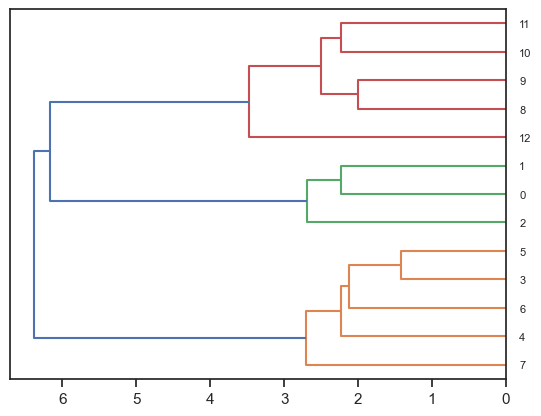

In [13]:
# セントロイド法
centroid_result = linkage(dist_matrix, method="centroid")

# 図の表示
fig = dendrogram(centroid_result, leaf_font_size=8, orientation='left')
plt.show()

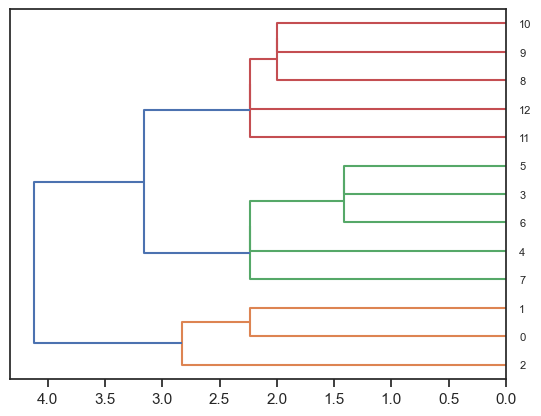

In [14]:
# 最短距離法
single_linkage_result = linkage(dist_matrix, method="single")

# 図の表示
fig = dendrogram(single_linkage_result, leaf_font_size=8, orientation='left')
plt.show()

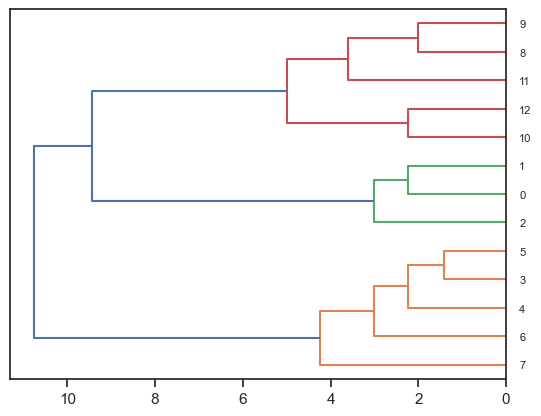

In [15]:
# 最長距離法
complete_linkage_result = linkage(dist_matrix, method="complete")

# 図の表示
fig = dendrogram(complete_linkage_result, leaf_font_size=8, orientation='left')
plt.show()